In [1]:
%reload_ext autoreload
%autoreload 2

import sys

import py21cmfast as p21c
from astropy.cosmology import Planck18

sys.path.append("..")
from dm21cm.dm_params import DMParams
from dm21cm.evolve import evolve

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
return_dict = evolve(
    run_name = 'test_elec',
    z_start = 45.,
    z_end = 5.,
    zplusone_step_factor = 1.01,
    dm_params = DMParams(
        mode='swave',
        primary='elec_delta',
        m_DM=1e8,
        sigmav=1e-23,
        struct_boost_model='erfc 1e-3',
    ),
    enable_elec = True,
    tf_version = '230629',
    
    p21c_initial_conditions = p21c.initial_conditions(
        user_params = p21c.UserParams(
            HII_DIM = 64,
            BOX_LEN = 64 * 2, # [conformal Mpc]
            N_THREADS = 32,
        ),
        cosmo_params = p21c.CosmoParams(
            OMm = Planck18.Om0,
            OMb = Planck18.Ob0,
            POWER_INDEX = Planck18.meta['n'],
            SIGMA_8 = Planck18.meta['sigma8'],
            hlittle = Planck18.h,
        ),
        random_seed = 54321,
        write = True,
    ),
    
    rerun_DH = False,
    clear_cache = False,
    use_tqdm = False,
)

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/inputs.py:487: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
INFO:root:Using 21cmFAST version 0.1.dev1579+g6b1da6d.d20230914
INFO:root:Cache dir: /n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/test_elec
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA Interpreter
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'
INFO:root:TransferFunctionWrapper: Loaded photon transfer functions.
INFO:root:TransferFunctionWrapper: Loaded electron transfer funct

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204


In [3]:
return_dict['profiler'].print_summary()

xray: 0.1534 +/- 0.0362 s
bath+dm: 0.0843 +/- 0.0014 s
21cmFAST: 0.1781 +/- 0.1204 s
prep_next: 0.5808 +/- 0.3230 s


<Axes: xlabel='Iteration', ylabel='Time [s]'>

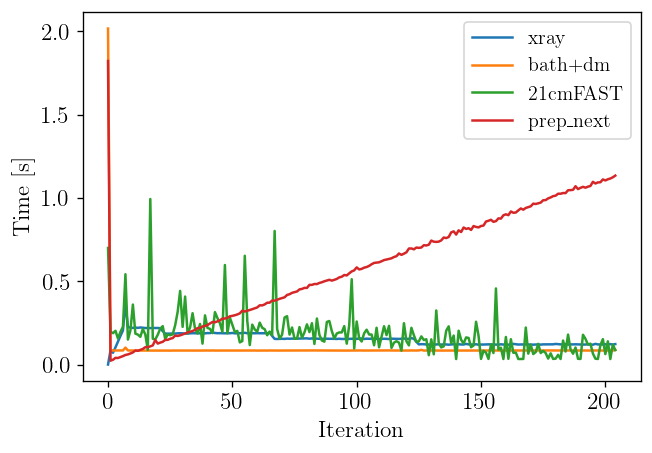

In [4]:
return_dict['profiler'].plot()

## Profiling

In [15]:
import cProfile
import pstats

In [16]:
def f():
    return_dict = evolve(
        run_name = 'test',
        z_start = 45.,
        z_end = 35.,
        zplusone_step_factor = 1.01,
        dm_params = DMParams(
            mode='swave',
            primary='phot_delta',
            m_DM=1e10,
            sigmav=1e-23,
            struct_boost_model='erfc 1e-3',
        ),
        enable_elec = False,
        tf_version = '230629',
        
        p21c_initial_conditions = p21c.initial_conditions(
            user_params = p21c.UserParams(
                HII_DIM = 64,
                BOX_LEN = 64 * 2, # [conformal Mpc]
                N_THREADS = 32,
            ),
            cosmo_params = p21c.CosmoParams(
                OMm = Planck18.Om(0),
                OMb = Planck18.Ob(0),
                POWER_INDEX = Planck18.meta['n'],
                SIGMA_8 = Planck18.meta['sigma8'],
                hlittle = Planck18.h,
            ),
            random_seed = 54321,
            write = True,
        ),
        
        rerun_DH = False,
        clear_cache = False,
        use_tqdm = True,
    )   

In [17]:
profiler = cProfile.Profile()
profiler.enable()
f()
profiler.disable()

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/inputs.py:487: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
INFO:root:Using 21cmFAST version 0.1.dev1579+g6b1da6d.d20230914
INFO:root:Cache dir: /n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/test
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA Interpreter
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'
INFO:root:TransferFunctionWrapper: Loaded photon transfer functions.
INFO:root:DarkHistoryWrapper: Found existing DarkHistory initial condi

In [ ]:
stats = pstats.Stats(profiler).sort_stats('cumulative')

stats.print_stats()